In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fandango = pd.read_csv("fandango_scrape.csv")

In [4]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


<Axes: xlabel='RATING', ylabel='VOTES'>

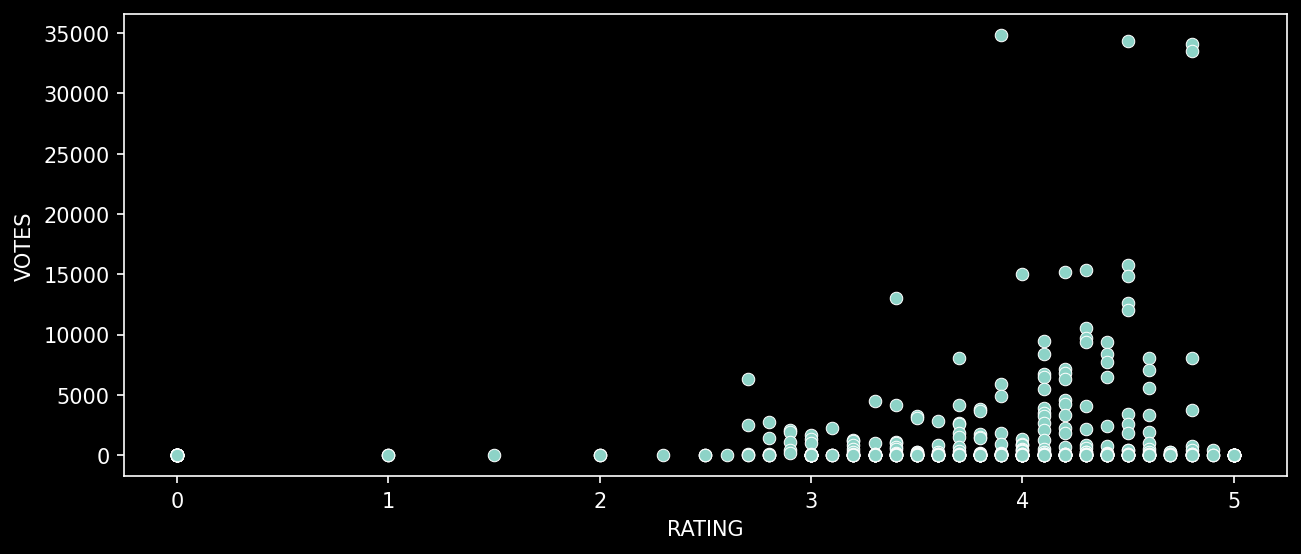

In [7]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=fandango, x= 'RATING', y='VOTES')

In [8]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1])

In [9]:
fandango['YEAR'].value_counts()

YEAR
2015)    478
2014)     23
2016)      1
1964)      1
2012)      1
Name: count, dtype: int64

<Axes: xlabel='YEAR', ylabel='count'>

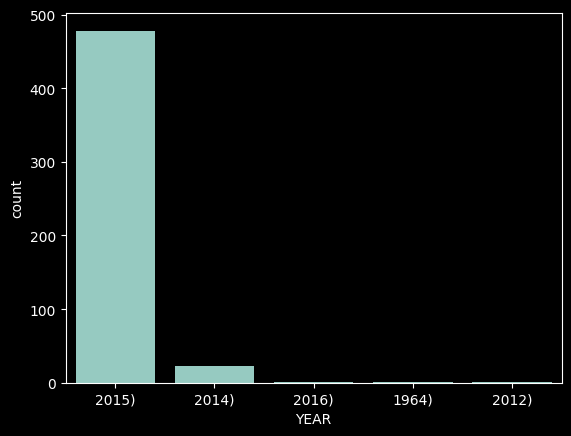

In [10]:
sns.countplot(data=fandango, x='YEAR')

In [11]:
fandango.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015)
1,Jurassic World (2015),4.5,4.5,34390,2015)
2,American Sniper (2015),5.0,4.8,34085,2015)
3,Furious 7 (2015),5.0,4.8,33538,2015)
4,Inside Out (2015),4.5,4.5,15749,2015)
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014)
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015)
7,Minions (2015),4.0,4.0,14998,2015)
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015)
9,Into the Woods (2014),3.5,3.4,13055,2014)


In [12]:
no_votes = fandango['VOTES']==0
no_votes.sum()

69

In [13]:
fan_reviewed = fandango[fandango['VOTES']>0]

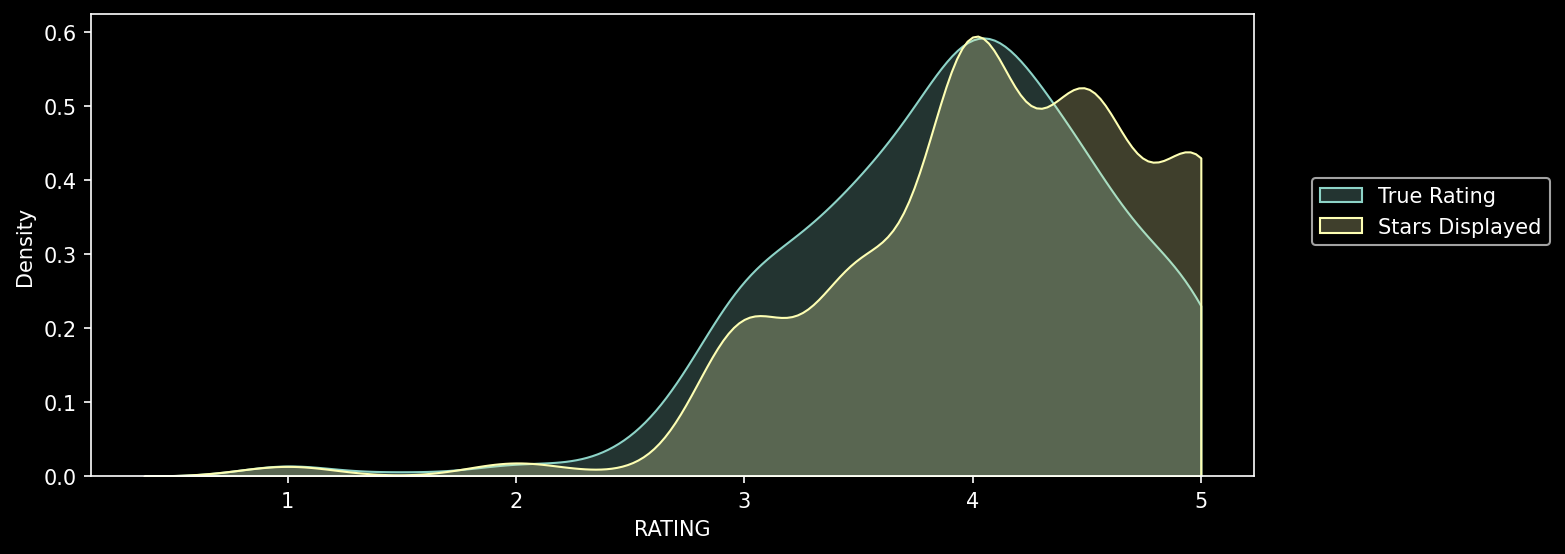

In [14]:
plt.figure(figsize=(10,4), dpi=150)
sns.kdeplot(data=fan_reviewed, x='RATING', clip=[0,5], fill= True, label='True Rating')
sns.kdeplot(data=fan_reviewed, x='STARS', clip=[0,5], fill=True, label='Stars Displayed')

plt.legend(loc=(1.05,0.5))

In [16]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),0.1
1,Jurassic World (2015),4.5,4.5,34390,2015),0.0
2,American Sniper (2015),5.0,4.8,34085,2015),0.2
3,Furious 7 (2015),5.0,4.8,33538,2015),0.2
4,Inside Out (2015),4.5,4.5,15749,2015),0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015),0.0
431,The Intern (2015),5.0,5.0,1,2015),0.0
432,The Park Bench (2015),5.0,5.0,1,2015),0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015),0.0


C:\Users\Muruga\AppData\Local\Temp\ipykernel_20920\3977021581.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fan_reviewed, x='STARS_DIFF', palette='magma')


<Axes: xlabel='STARS_DIFF', ylabel='count'>

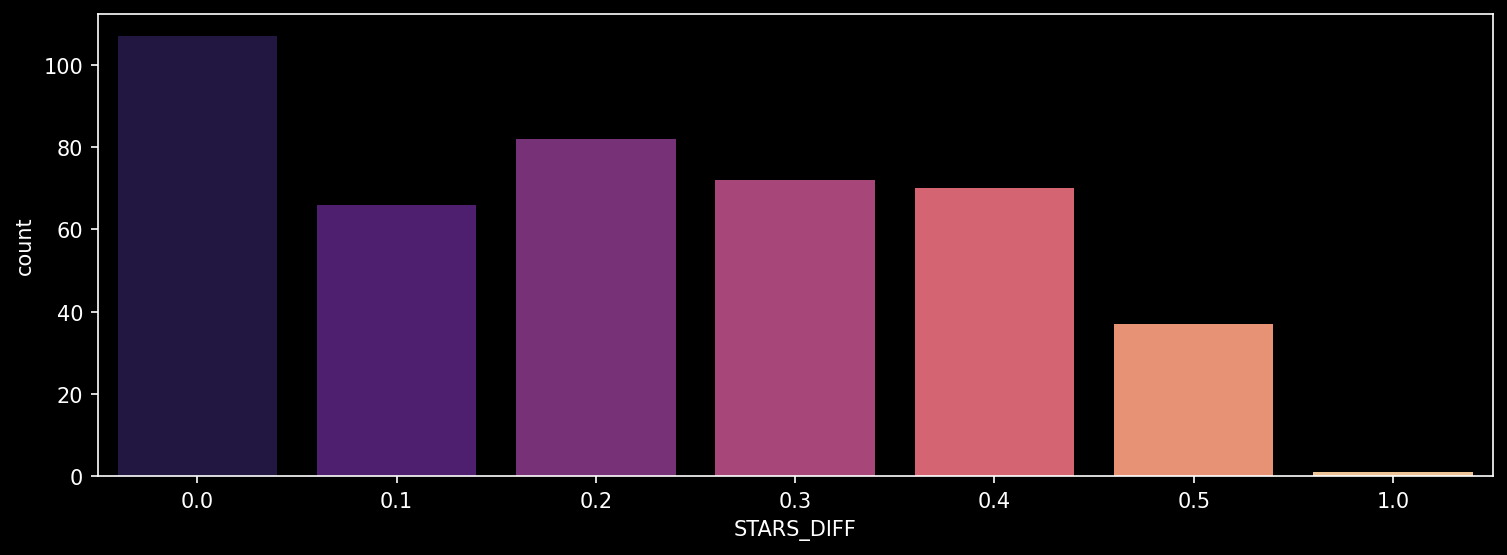

In [17]:
plt.figure(figsize=(12,4), dpi=150)
sns.countplot(data=fan_reviewed, x='STARS_DIFF', palette='magma')

In [18]:
fan_reviewed[fan_reviewed['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015),1.0


In [19]:
all_sites = pd.read_csv('all_sites_scores.csv')

In [20]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [21]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [22]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


(0.0, 100.0)

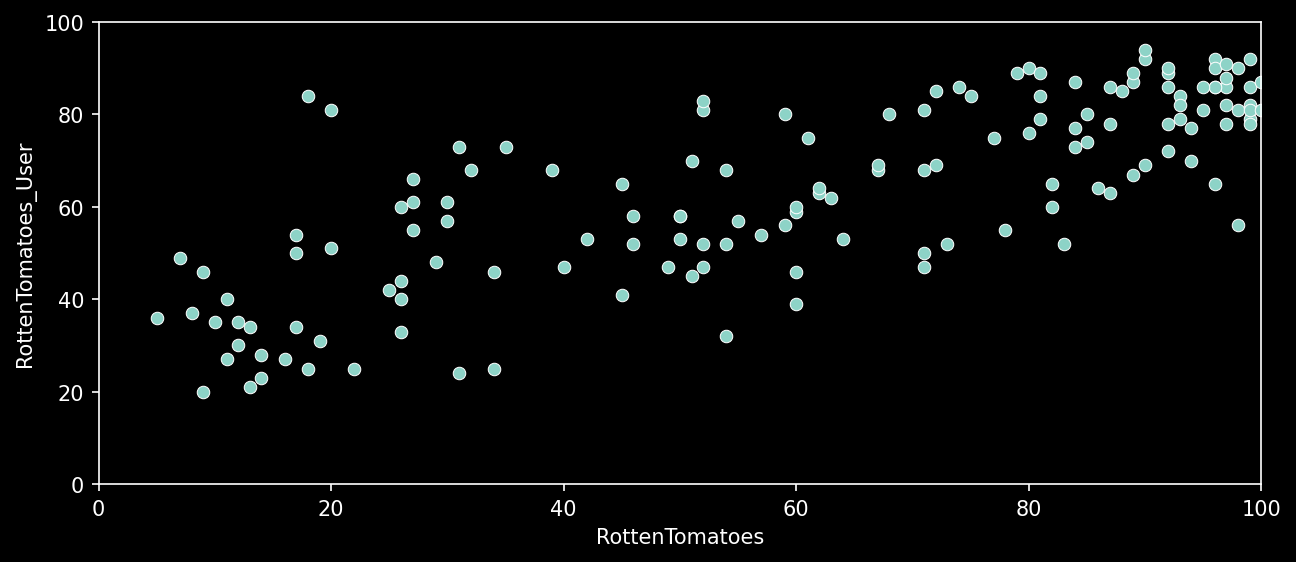

In [23]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User')
plt.xlim(0,100)
plt.ylim(0,100)

In [24]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes']

Text(0.5, 1.0, 'RT Critics score minus RT User Score')

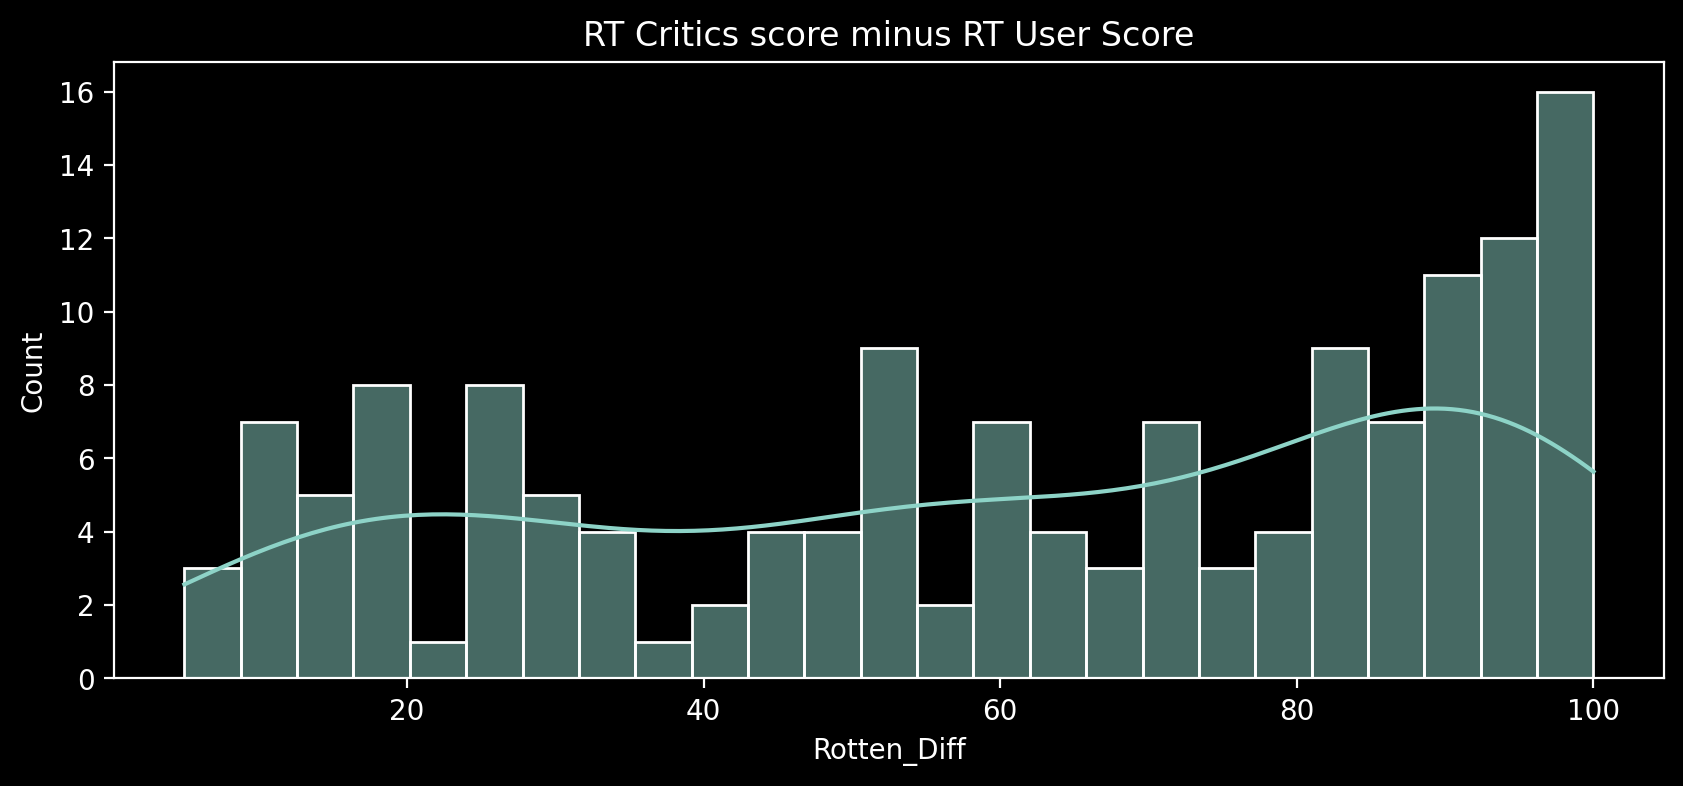

In [25]:
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(data=all_sites, x='Rotten_Diff', kde=True, bins=25)
plt.title("RT Critics score minus RT User Score")

Text(0.5, 1.0, 'Abs Difference between RT Critics Score and RT User Score')

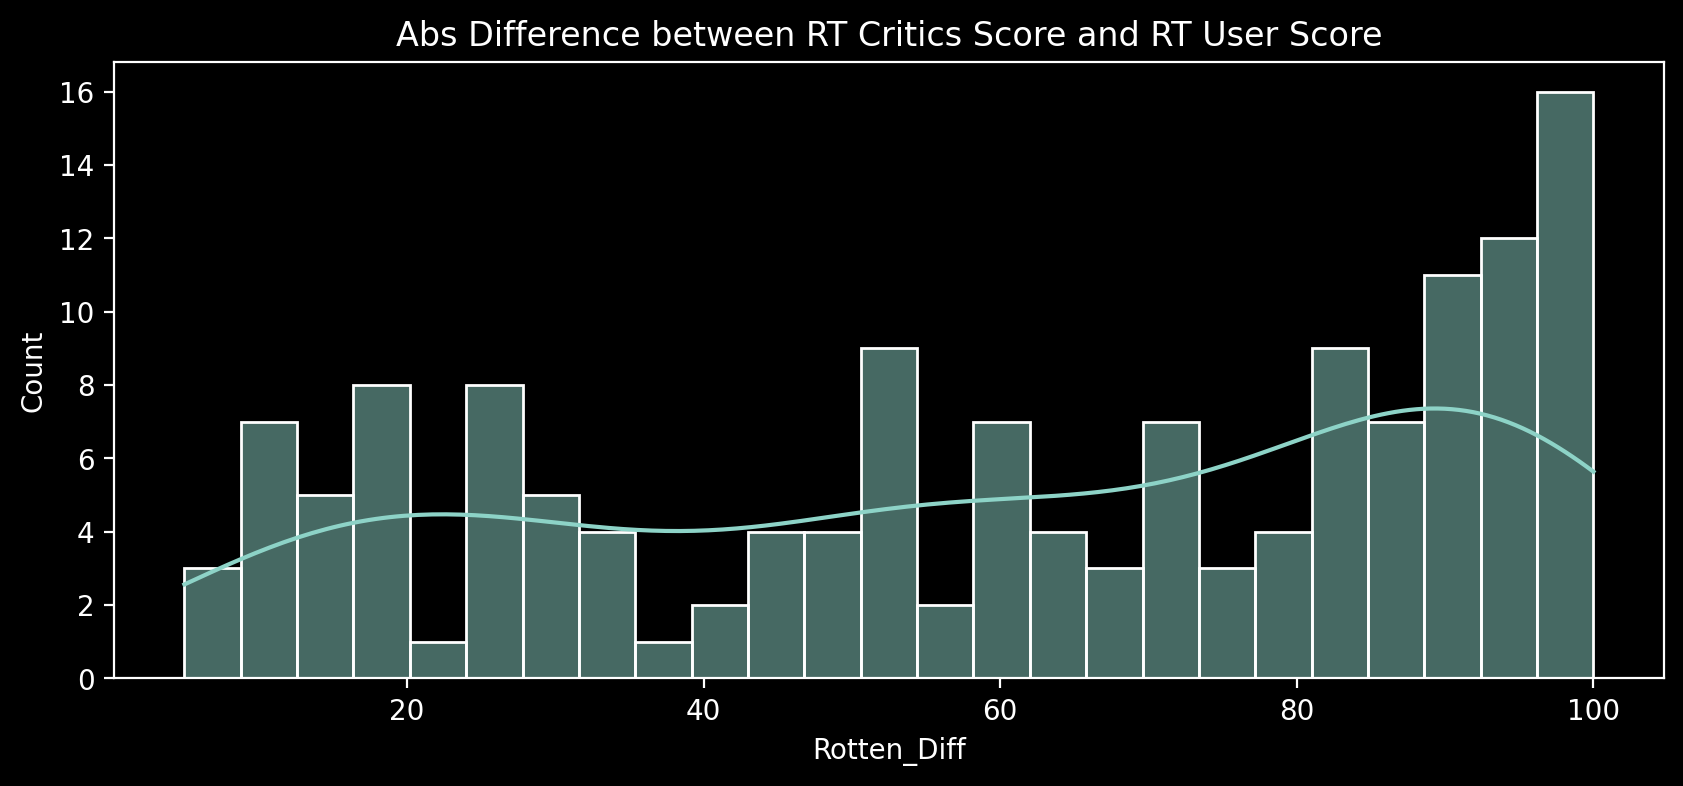

In [26]:
plt.figure(figsize=(10,4), dpi=200)
sns.histplot(x=all_sites['Rotten_Diff'].apply(abs), bins=25, kde=True)
plt.title("Abs Difference between RT Critics Score and RT User Score")

In [31]:
print("Users love but critics hate")
all_sites.nsmallest(5, 'Rotten_Diff')[['FILM', 'Rotten_Diff']]

Users love but critics hate


,FILM,Rotten_Diff
133,Paul Blart: Mall Cop 2 (2015),5
105,Hitman: Agent 47 (2015),7
53,Hot Pursuit (2015),8
15,Taken 3 (2015),9
48,Fantastic Four (2015),9


In [32]:
print("Critics love, but Users Hate")
all_sites.nlargest(5, 'Rotten_Diff')[['FILM', 'Rotten_Diff']]

Critics love, but Users Hate


,FILM,Rotten_Diff
70,Seymour: An Introduction (2015),100
144,Gett: The Trial of Viviane Amsalem (2015),100
8,Shaun the Sheep Movie (2015),99
12,Leviathan (2014),99
25,Selma (2014),99


(0.0, 10.0)

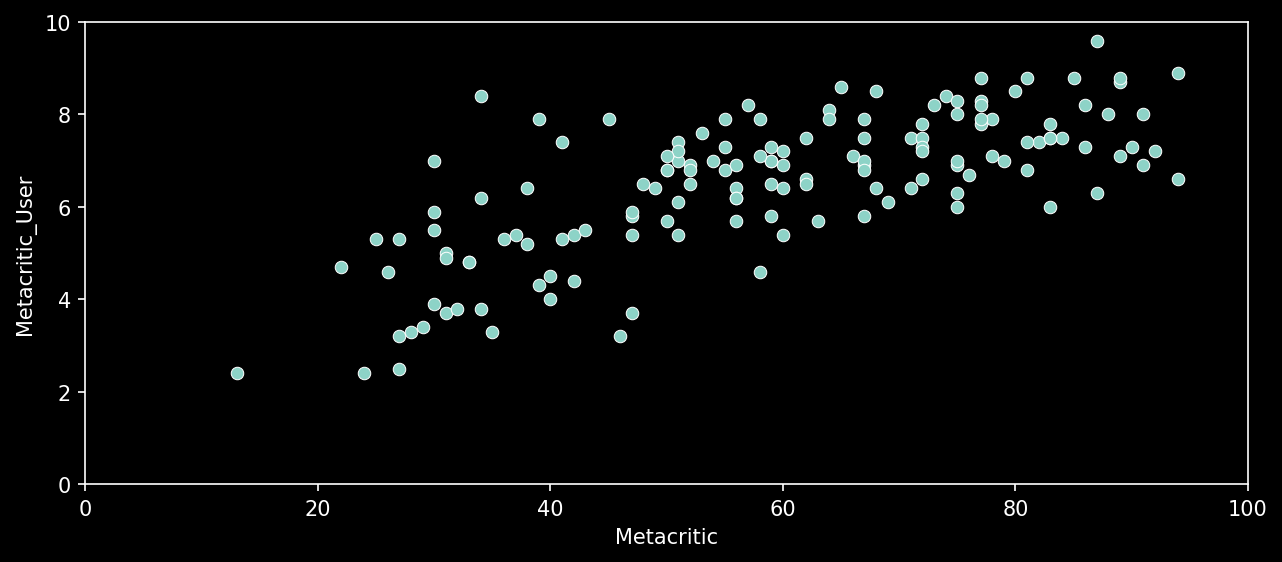

In [35]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User')
plt.xlim(0,100)
plt.ylim(0,10)

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

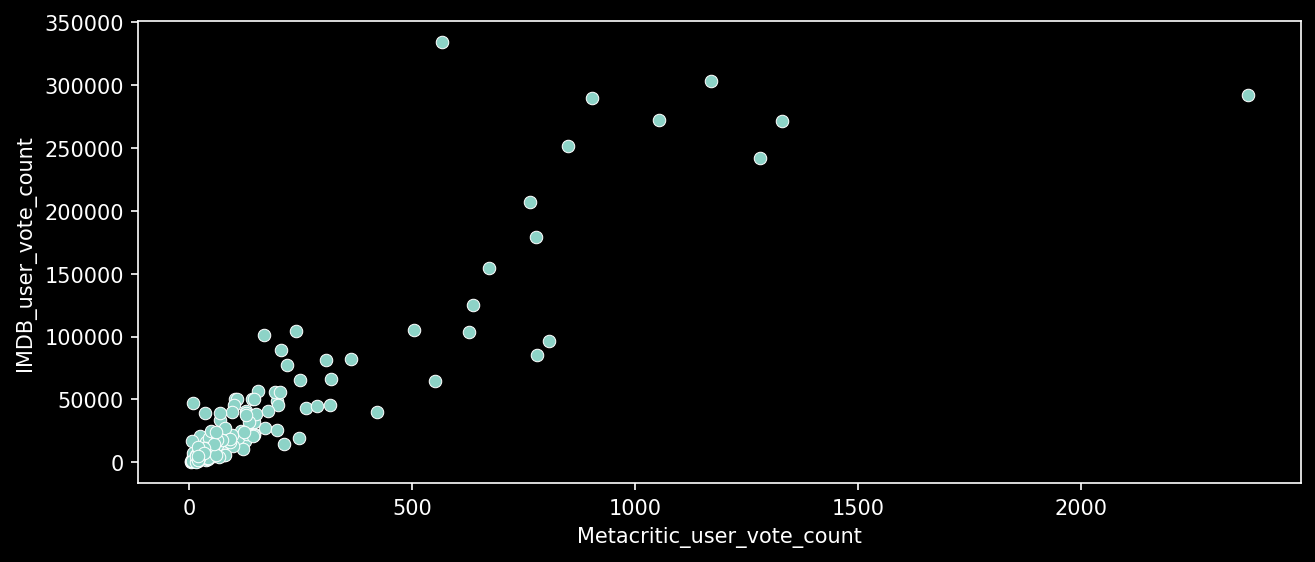

In [34]:
plt.figure(figsize=(10,4), dpi=150)
sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count')

In [36]:
all_sites.nlargest(1, 'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,90


In [37]:
all_sites.nlargest(1, 'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,97


In [38]:
df = pd.merge(fandango,all_sites, on='FILM', how='inner')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [40]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,25
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,71
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,72
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,81
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,98


In [41]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20, 1)
df['RTU_Norm'] = np.round(df['RottenTomatoes_User']/20, 1)

In [42]:
df['Meta_Norm'] = np.round(df['Metacritic']/20, 1)
df['Meta_U_Norm'] = np.round(df['Metacritic_User']/2, 1)

In [43]:
df['IMDB_Norm'] = np.round(df['IMDB']/2, 1)

In [44]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015),25,42,46,3.2,4.2,778,179506,25,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015),71,81,59,7.0,7.3,1281,241807,71,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015),72,85,72,6.6,7.4,850,251856,72,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015),81,84,67,6.8,7.4,764,207211,81,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015),98,90,94,8.9,8.6,807,96252,98,4.9,4.5,4.7,4.4,4.3


In [47]:
norm_scores = df[['STARS', 'RATING', 'RT_Norm', 'Meta_Norm', 'Meta_U_Norm', "IMDB_Norm"]]

In [46]:
norm_scores.head()

,STARS,RATING,RT_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.3,1.6,2.1
1,4.5,4.5,3.6,3.0,3.5,3.6
2,5.0,4.8,3.6,3.6,3.3,3.7
3,5.0,4.8,4.0,3.4,3.4,3.7
4,4.5,4.5,4.9,4.7,4.4,4.3


In [48]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles - old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

C:\Users\Muruga\AppData\Local\Temp\ipykernel_20920\3564412342.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=norm_scores, clip=[0,5], shade=True, palette='Set1', ax=ax)


NameError: name 'handles' is not defined

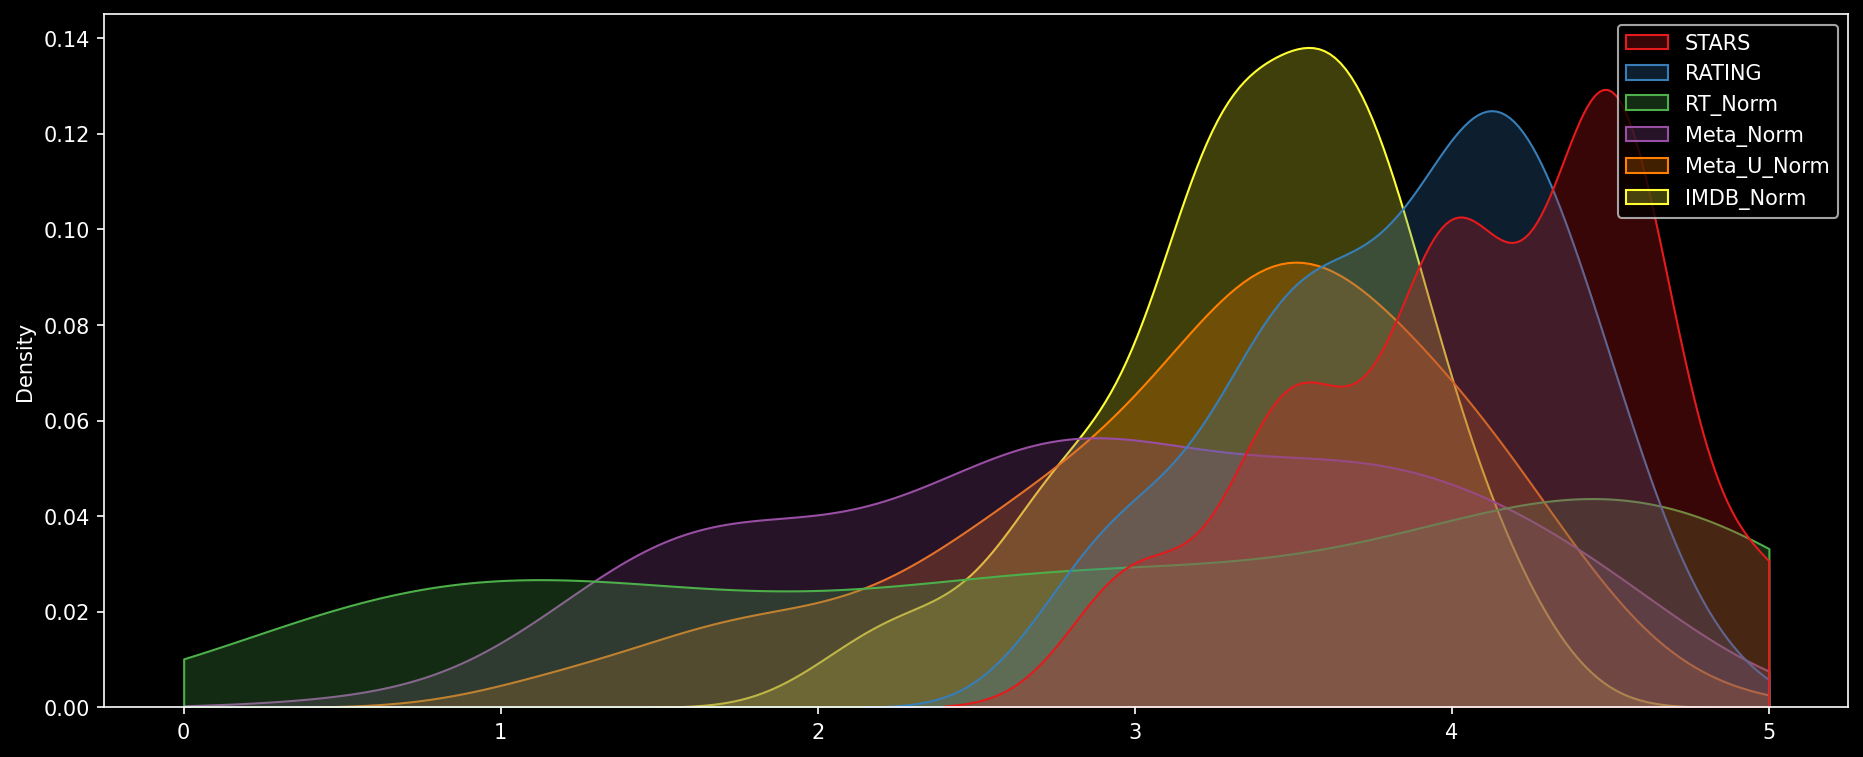

In [49]:
fig, ax = plt.subplots(figsize=(15,6), dpi=150)
sns.kdeplot(data=norm_scores, clip=[0,5], shade=True, palette='Set1', ax=ax)
move_legend(ax, "upper left")

C:\Users\Muruga\AppData\Local\Temp\ipykernel_20920\4272579469.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=norm_scores[['RT_Norm', 'STARS']], clip=[0,5], shade=True, palette='Set1', ax=ax)


NameError: name 'handles' is not defined

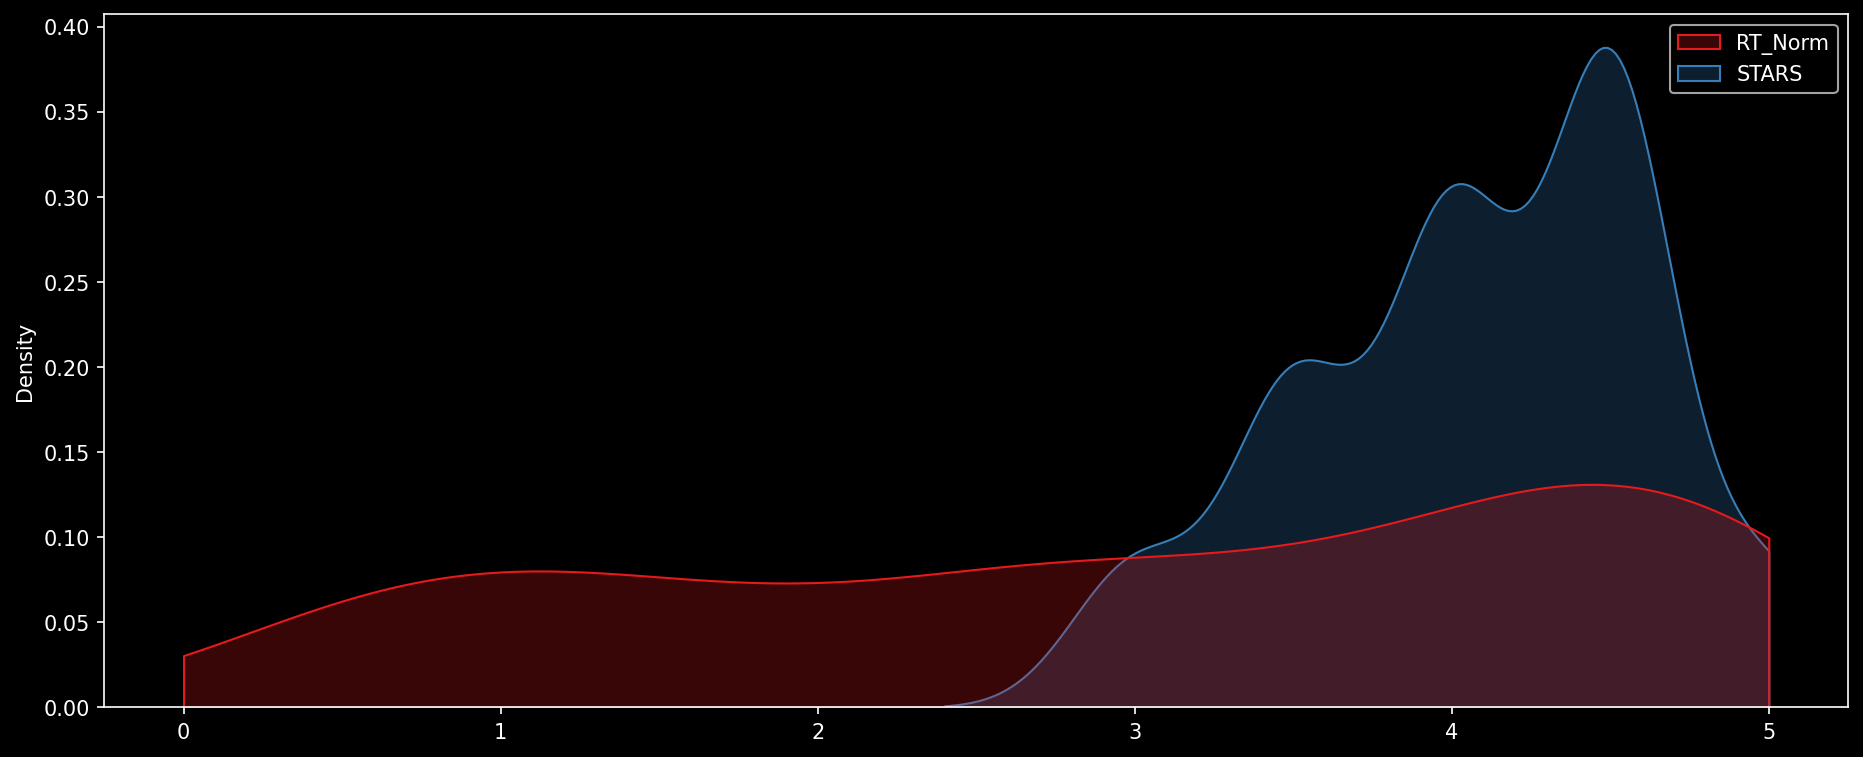

In [50]:
fig, ax = plt.subplots(figsize=(15,6), dpi=150)
sns.kdeplot(data=norm_scores[['RT_Norm', 'STARS']], clip=[0,5], shade=True, palette='Set1', ax=ax)
move_legend(ax, "upper left")

<Axes: ylabel='Count'>

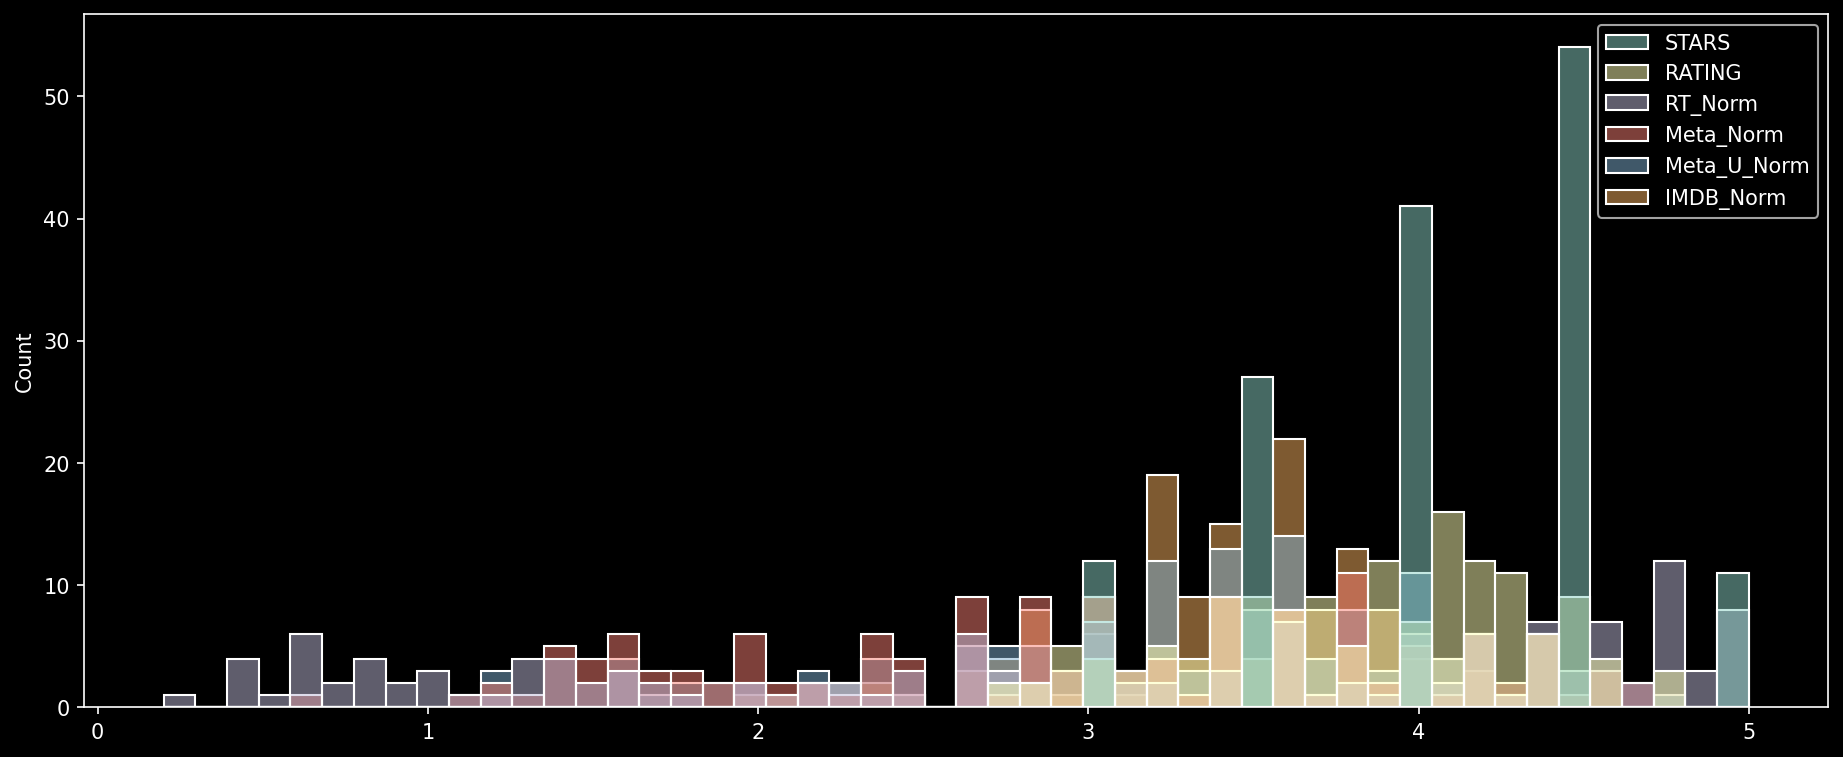

In [51]:
plt.subplots(figsize=(15,6), dpi=150)
sns.histplot(norm_scores, bins=50)

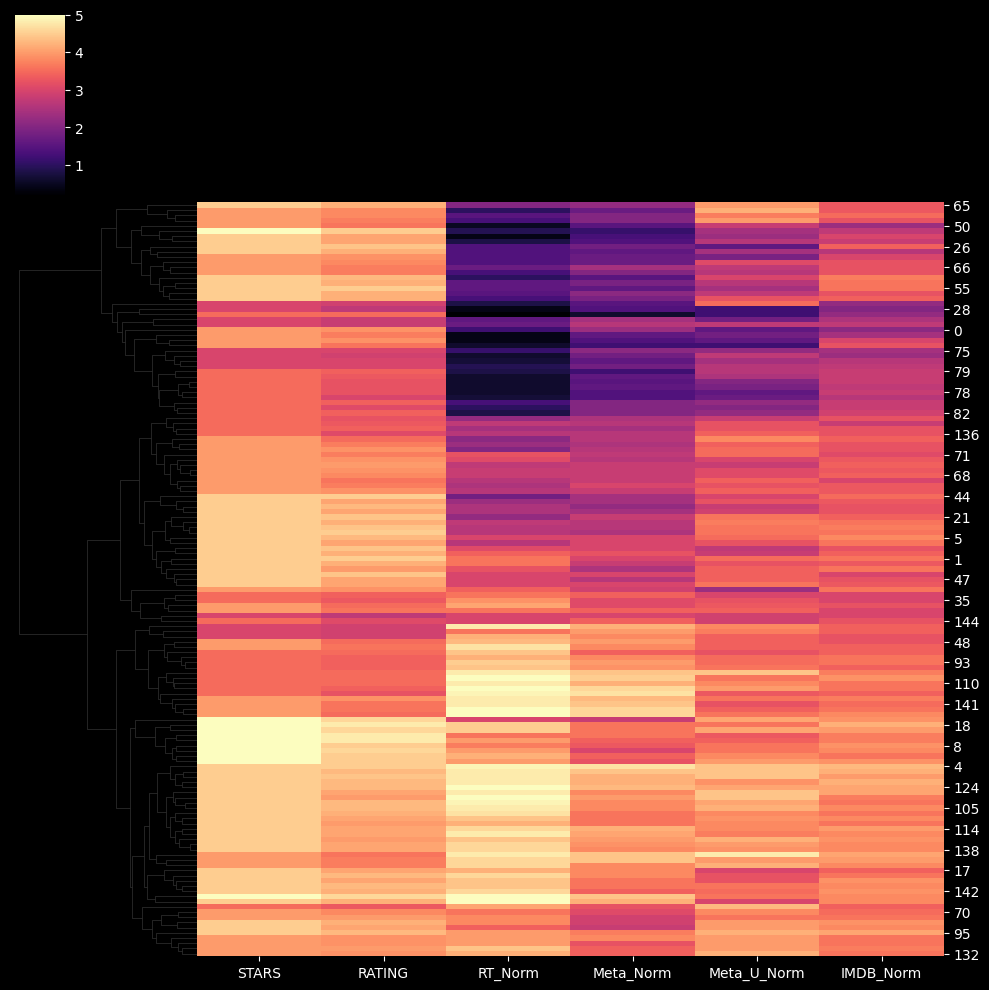

In [52]:
sns.clustermap(norm_scores, cmap='magma', col_cluster=False)

In [53]:
norm_films = df[['STARS', 'RATING', 'RT_Norm','Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm', 'FILM']]

In [54]:
norm_films.nsmallest(10, 'RT_Norm')


,STARS,RATING,RT_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.6,1.9,2.7,Unfinished Business (2015)


C:\Users\Muruga\AppData\Local\Temp\ipykernel_20920\2172007374.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=worst_films, clip=[0,5], shade=True, palette='Set1')


Text(0.5, 1.0, "Ratings for Rt Critic's 10 worst reviewed films")

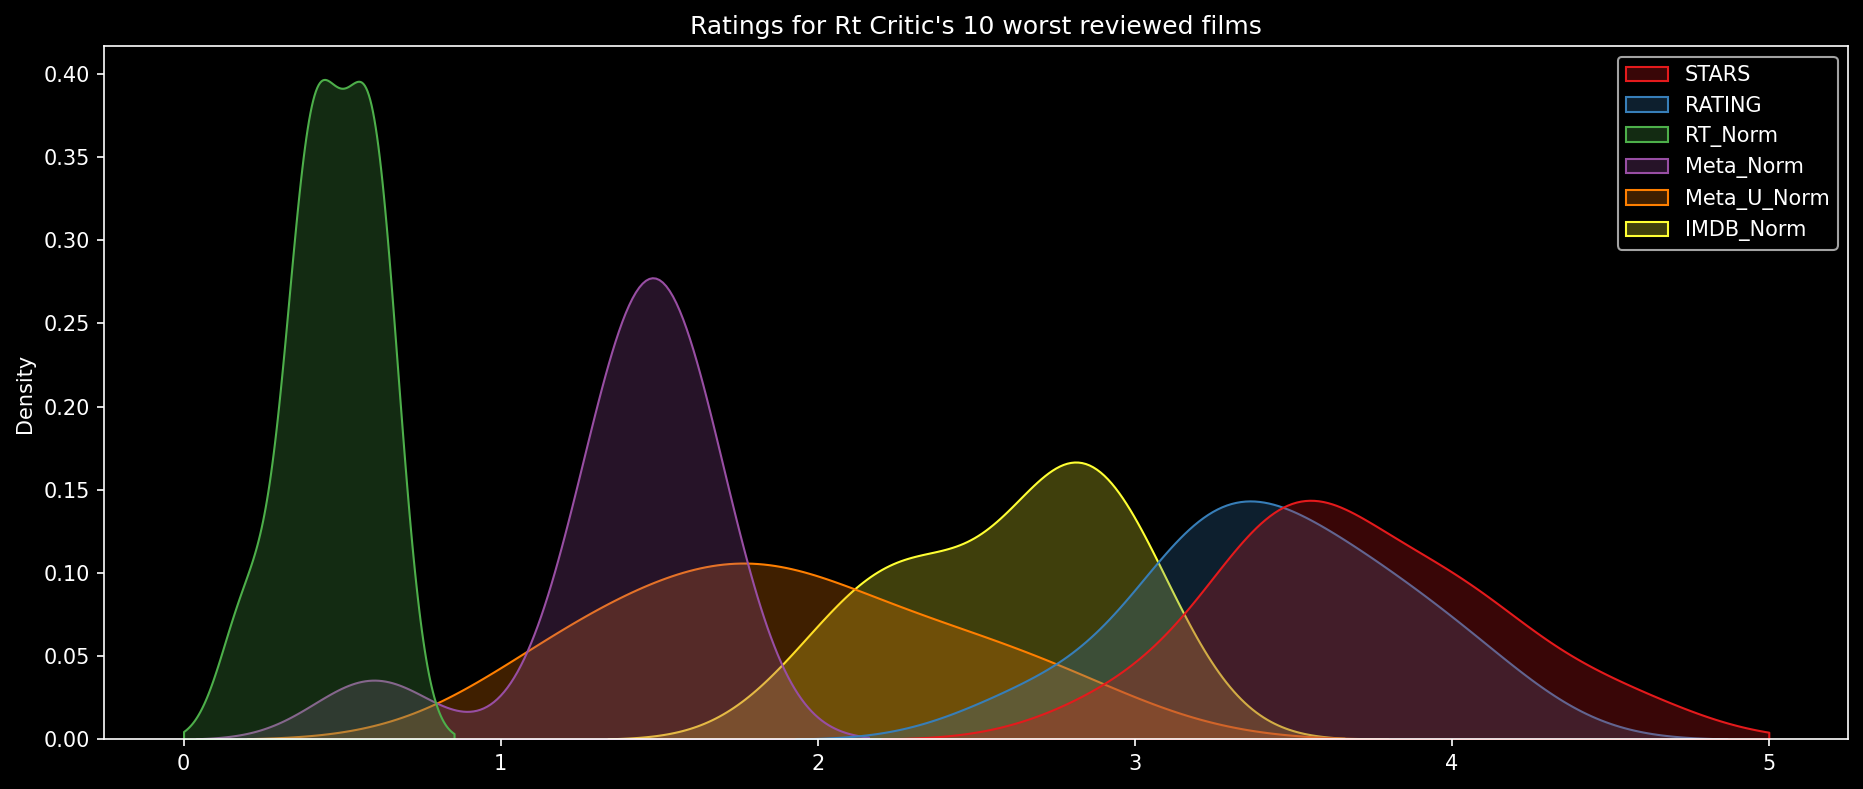

In [55]:
plt.figure(figsize=(15,6), dpi=150)
worst_films = norm_films.nsmallest(10, 'RT_Norm').drop('FILM', axis=1)
sns.kdeplot(data=worst_films, clip=[0,5], shade=True, palette='Set1')
plt.title("Ratings for Rt Critic's 10 worst reviewed films")